# FEATURE REMOVAL

<div style="align-items: end; width: 100%; display: flex; flex-direction: row; justify-content: center;">
    <p style="text-align: center; width: 14%;"><b>Input video</b></p>
    <p style="text-align: center; width: 14%;"><b>Black (hard edges)</b></p>
    <p style="text-align: center; width: 14%;"><b>Black (no hard edges)</b></p>
    <p style="text-align: center; width: 14%;"><b>Mean color (hard edges)</b></p>
    <p style="text-align: center; width: 14%;"><b>Mean color (no hard edges)</b></p>
    <p style="text-align: center; width: 14%;"><b>Blurring (hard edges)</b></p>
    <p style="text-align: center; width: 14%;"><b>Blurring (no hard edges)</b></p>
</div>

<div style="width: 100%; display: flex; flex-direction: row; justify-content: center;">
    <img style="width: 14%;" src="../resources/gifs/blowing glass.gif"/>
    <img style="width: 14%;" src="../resources/gifs/hardedges-black.gif"/>
    <img style="width: 14%;" src="../resources/gifs/nohardedges-black.gif"/>
    <img style="width: 14%;" src="../resources/gifs/hardedges-mean.gif"/>
    <img style="width: 14%;" src="../resources/gifs/nohardedges-mean.gif"/>
    <img style="width: 14%;" src="../resources/gifs/hardedges-blur.gif"/>
    <img style="width: 14%;" src="../resources/gifs/nohardedges-blur.gif"/>
</div>

In [1]:
import os

from revex_framework.segmenters import GridSegmenter, RiseSegmenter 
from revex_framework.perturbers import MultiplePerturber
from revex_framework.utils import load_video, resize_video, center_crop_video, plot_frames

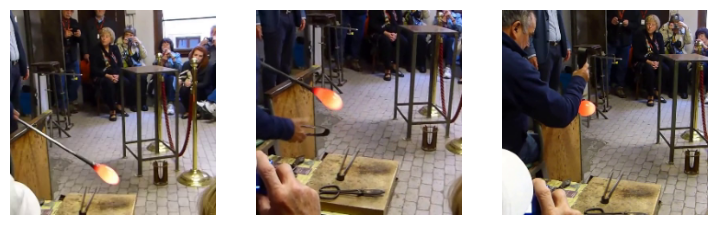

In [3]:
# Load video, rescale and crop
video_path = "../../resources/blowing glass.mp4"
video = load_video(video_path)
scale_factor = 224 / min(video.shape[1:3])
video = resize_video(video, scale_factor, scale_factor)
video = center_crop_video(video, 224)

# Temporary save video path
save_path = "../temp"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Show video
plot_frames(video)

## With hard edges

In [25]:
segmenter = GridSegmenter(video)
segments = segmenter.segment(n_seg=[3, 5, 5])

### Black

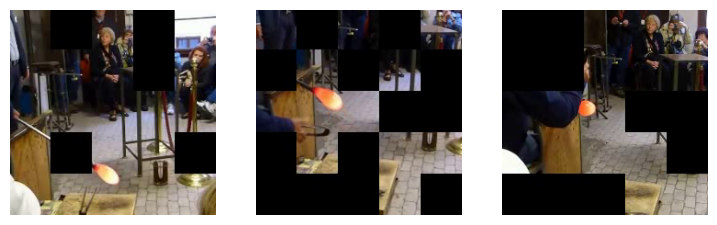

In [26]:
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color=0)
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Mean color of removed region

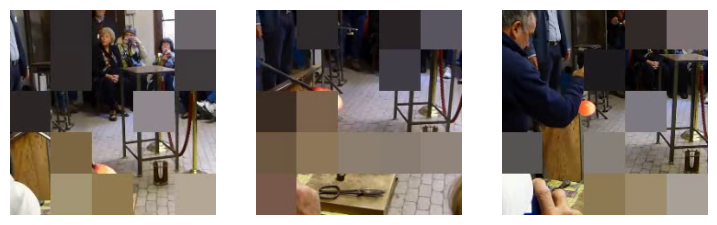

In [27]:
# Mean color occlusions
perturber = MultiplePerturber(video, segments, classifier_fn=None)
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Blurring

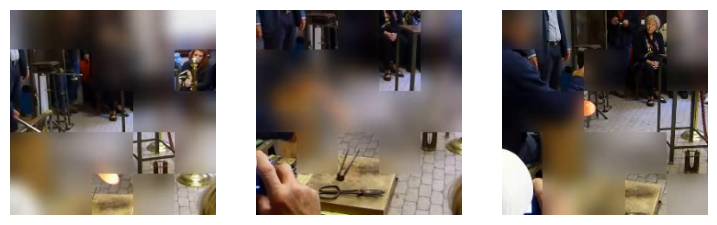

In [28]:
# Mean color occlusions
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color='blur')
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

## Without hard edges (blurring)

### Black

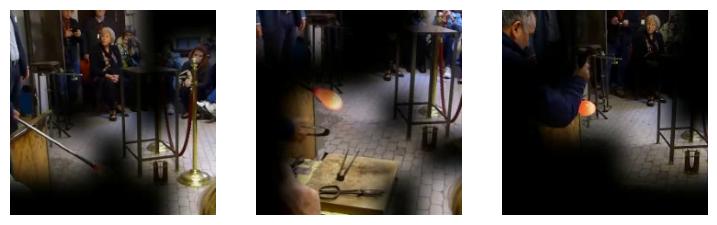

In [29]:
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color=0)
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True, blur_mode='2d', blur_radius=40)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Mean color of removed region

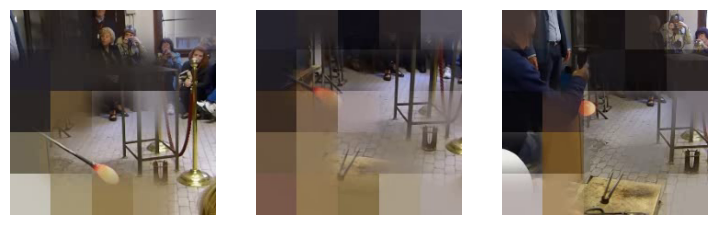

In [19]:
# Mean color occlusions
perturber = MultiplePerturber(video, segments, classifier_fn=None)
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True, blur_mode='2d', blur_radius=40)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Blurring

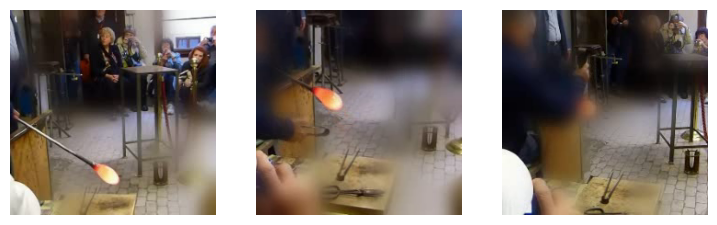

In [30]:
# Mean color occlusions
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color='blur')
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True, blur_mode='2d', blur_radius=40)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

## Without hard edges (up-sampling)

In [32]:
segmenter = RiseSegmenter(video)
segments = segmenter.segment(n_seg=[3, 5, 5])

### Black

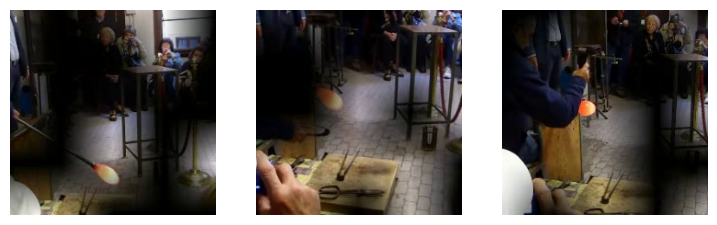

In [22]:
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color=0)
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True, blur_mode='2d', blur_radius=40)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Mean color of removed region

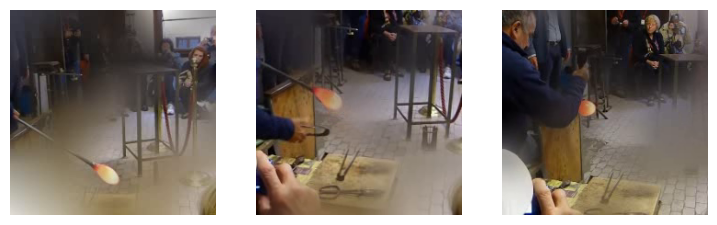

In [33]:
# Mean color occlusions
perturber = MultiplePerturber(video, segments, classifier_fn=None)
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True, blur_mode='2d', blur_radius=40)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Blurring

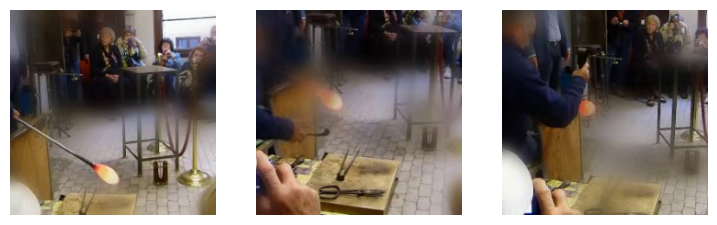

In [24]:
# Mean color occlusions
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color='blur')
data, labels = perturber.perturb(num_samples=1, progress_bar=False, save_videos_path=save_path, dont_predict=True, blur_mode='2d', blur_radius=40)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))